# Consigna del Desafío 1 e Implementación

## 1. Vectorización y análisis de similitud usando 20newsgroups
**Tomar 5 documentos al azar y medir similaridad con el resto de los documentos.
Estudiar los 5 documentos más similares de cada uno analizar si tiene sentido
la similaridad según el contenido del texto y la etiqueta de clasificación.**

In [2]:
import numpy as np
import random
import pandas as pd
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

#### Carga del dataset 20newsgroups:

- Cargamos el dataset eliminando encabezados, pies y citas, para conservar solo el contenido relevante del texto.



In [10]:
newsgroups = fetch_20newsgroups(subset='train', remove=('headers', 'footers', 'quotes'))

print(f"Número de documentos cargados: {len(newsgroups.data)}")
print("Categorías disponibles:", newsgroups.target_names[:10], "...\n")
print("Ejemplo de documento:\n", newsgroups.data[0][:500])
print("\nCategoría del documento:", newsgroups.target_names[newsgroups.target[0]])

Número de documentos cargados: 11314
Categorías disponibles: ['alt.atheism', 'comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'comp.windows.x', 'misc.forsale', 'rec.autos', 'rec.motorcycles', 'rec.sport.baseball'] ...

Ejemplo de documento:
 I was wondering if anyone out there could enlighten me on this car I saw
the other day. It was a 2-door sports car, looked to be from the late 60s/
early 70s. It was called a Bricklin. The doors were really small. In addition,
the front bumper was separate from the rest of the body. This is 
all I know. If anyone can tellme a model name, engine specs, years
of production, where this car is made, history, or whatever info you
have on this funky looking car, please e-mail.

Categoría del documento: rec.autos


#### Vectorización de documentos con TF-IDF:
- Transformamos los textos en representaciones vectoriales usando TF-IDF,
lo que da más peso a términos relevantes y menos importancia a palabras frecuentes y poco informativas.

In [11]:
vectorizer = TfidfVectorizer(stop_words='english')
X_tfidf = vectorizer.fit_transform(newsgroups.data)

print("Dimensiones de la matriz TF-IDF:", X_tfidf.shape)
print("\nFragmento del vector TF-IDF del primer documento:")
print(X_tfidf[0].toarray()[0][:20])

Dimensiones de la matriz TF-IDF: (11314, 101322)

Fragmento del vector TF-IDF del primer documento:
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


#### Seleccionamnos aleatoriamente de 5 documentos:
- Elegimos al azar 5 documentos del dataset para analizar la similitud con el resto del corpus.

In [5]:
random.seed(42)
selected_indices = random.sample(range(len(newsgroups.data)), 5)
selected_docs = X_tfidf[selected_indices]

#### Cálculo de similitud coseno:
- Calculamos la similitud coseno entre los documentos seleccionados y el resto del dataset.
- La similitud coseno nos permite medir cómo de similares son dos documentos basándose en su contenido.

In [7]:
similarities = cosine_similarity(selected_docs, X_tfidf)

#### Análisis de documentos más similares:

In [9]:
for idx, sim in zip(selected_indices, similarities):
    sim[idx] = 0  # Evitamos considerar el documento consigo mismo
    top_indices = sim.argsort()[-5:][::-1]

    print("\n" + "="*80)
    print(f"Documento seleccionado (Categoría: {newsgroups.target_names[newsgroups.target[idx]]}):\n")
    print(newsgroups.data[idx][:500])
    print("\nDocumentos más similares:\n")

    for i in top_indices:
        print(f"Categoría: {newsgroups.target_names[newsgroups.target[i]]} | Similitud: {sim[i]:.4f}")
        print(newsgroups.data[i][:300], "\n", "-"*80)


Documento seleccionado (Categoría: rec.sport.hockey):

This is a general question for US readers:

How extensive is the playoff coverage down there?  In Canada, it is almost
impossible not to watch a series on TV (ie the only two series I have not had
an opportunity to watch this year are Wash-NYI and Chi-Stl, the latter because
I'm in the wrong time zone!).  We (in Canada) are basically swamped with 
coverage, and I wonder how many series/games are televised nationally or even
locally in the US and how much precedence they take over, say, local new

Documentos más similares:

Categoría: rec.sport.hockey | Similitud: 0.2184

I only have one comment on this:  You call this a *classic* playoff year
and yet you don't include a Chicago-Detroit series.  C'mon, I'm a Boston
fan and I even realize that Chicago-Detroit games are THE most exciting
games to watch. 
 --------------------------------------------------------------------------------
Categoría: rec.sport.baseball | Similitud: 0.1683

##### Análisis general y conclusión:

- En este ejercicio se tomaron **5 documentos aleatorios** del dataset **20newsgroups**, se vectorizaron utilizando **TF-IDF** y se midió su **similitud coseno** con el resto del corpus.

- En general, la similitud medida mediante TF-IDF y coseno refleja bien la cercanía temática entre los documentos:

  - Los documentos más similares suelen compartir claramente temas, términos específicos y pertenecen habitualmente a la misma o a categorías estrechamente relacionadas.
  - En algunos casos, documentos de categorías diferentes pueden mostrar cierta similitud debido a términos comunes o temáticas compartidas (por ejemplo, deportes diferentes o tecnología relacionada).

- Este enfoque confirma que la combinación de **TF-IDF y similitud coseno** es adecuada para identificar y evaluar la cercanía textual entre documentos en tareas de procesamiento de lenguaje natural.


## 2. Entrenar modelos de clasificación Naïve Bayes
**Maximizar el desempeño de clasificación
(f1-score macro) en el conjunto de datos de test. Considerar cambiar parámteros
de instanciación del vectorizador y los modelos y probar modelos de Naïve Bayes Multinomial y ComplementNB.**

In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB, ComplementNB
from sklearn.metrics import f1_score

#### Cargar el dataset 20newsgroups (train y test):
- Cargamos conjuntos separados para entrenamiento y test,
eliminando encabezados, pies y citas para limpiar los textos.

In [2]:
train = fetch_20newsgroups(subset='train', remove=('headers', 'footers', 'quotes'))
test = fetch_20newsgroups(subset='test', remove=('headers', 'footers', 'quotes'))

print(f"Cantidad de documentos en train: {len(train.data)}")
print(f"Cantidad de documentos en test: {len(test.data)}")

Cantidad de documentos en train: 11314
Cantidad de documentos en test: 7532


#### Vectorización TF-IDF con ajuste de parámetros:
- Probamos diferentes parámetros como `max_features`, `ngram_range` y `min_df`
para mejorar la representación numérica de los textos.

In [3]:
vectorizer = TfidfVectorizer(stop_words='english', max_features=15000, ngram_range=(1,2), min_df=5)

X_train_tfidf = vectorizer.fit_transform(train.data)
X_test_tfidf = vectorizer.transform(test.data)

print(f"Dimensiones matriz TF-IDF train: {X_train_tfidf.shape}")
print(f"Dimensiones matriz TF-IDF test: {X_test_tfidf.shape}")

Dimensiones matriz TF-IDF train: (11314, 15000)
Dimensiones matriz TF-IDF test: (7532, 15000)


#### Entrenamiento y evaluación de modelos Naïve Bayes:
- Evaluamos dos tipos de modelos Naïve Bayes (MultinomialNB y ComplementNB)
con diferentes parámetros del suavizado (alpha).
- Utilizamos la métrica f1-score macro para comparar el desempeño.

In [5]:
def evaluar_modelo(modelo, X_train, y_train, X_test, y_test):
    modelo.fit(X_train, y_train)
    predicciones = modelo.predict(X_test)
    return f1_score(y_test, predicciones, average='macro')

alphas = [0.01, 0.1, 1.0, 2.0]

resultados = []

for alpha in alphas:
    for modelo in [MultinomialNB(alpha=alpha), ComplementNB(alpha=alpha)]:
        nombre_modelo = type(modelo).__name__
        f1 = evaluar_modelo(modelo, X_train_tfidf, train.target, X_test_tfidf, test.target)
        resultados.append({
            'Modelo': nombre_modelo,
            'Alpha': alpha,
            'F1-Score Macro': f1
        })

# Crear DataFrame con resultados
df_resultados = pd.DataFrame(resultados).sort_values(by='F1-Score Macro', ascending=False)

print("Mejores resultados ordenados por F1-Score macro:\n")
print(df_resultados.head())

Mejores resultados ordenados por F1-Score macro:

          Modelo  Alpha  F1-Score Macro
5   ComplementNB   1.00        0.679755
7   ComplementNB   2.00        0.676131
2  MultinomialNB   0.10        0.672504
3   ComplementNB   0.10        0.671836
1   ComplementNB   0.01        0.668279


**Conclusiones:**
> Se observa que el mejor modelo fue ComplementNB con alpha=1.0, aunque las diferencias entre resultados son pequeñas.

#### Validación cruzada y experimentación con parámetros:
- Realizamos **validación cruzada** usando cross_val_score para evaluar rigurosamente el desempeño del modelo elegido (MultinomialNB o ComplementNB).
- Se experimenta con diferentes parámetros del vectorizador
(`max_df`, `max_features`, `min_df`, etc.) para optimizar aún más el desempeño.

In [6]:
from sklearn.model_selection import cross_val_score

vectorizer = TfidfVectorizer(stop_words='english', max_features=15000, max_df=0.9, min_df=5)
X_train_tfidf = vectorizer.fit_transform(train.data)

modelo_final = ComplementNB(alpha=0.1)

# Realizar validación cruzada (5 folds)
cv_scores = cross_val_score(modelo_final, X_train_tfidf, train.target, cv=5, scoring='f1_macro')

print("Resultados de validación cruzada (f1-score macro):", cv_scores)
print(f"Promedio validación cruzada: {cv_scores.mean():.4f} ± {cv_scores.std():.4f}")

Resultados de validación cruzada (f1-score macro): [0.72577822 0.72445263 0.7289647  0.73606746 0.74614209]
Promedio validación cruzada: 0.7323 ± 0.0080


**Conclusiones:**
> Estos resultados muestran claramente un desempeño robusto y estable del modelo. La validación cruzada permitió confirmar que el modelo no sólo tiene un buen rendimiento promedio, sino también baja variabilidad, lo que lo hace confiable para tareas reales.


#### Análisis adicional: Matriz de confusión y análisis de errores:
- Para entender mejor el desempeño del modelo elegido (`ComplementNB` con `alpha=0.1`),
generamos la **matriz de confusión** y el **reporte de clasificación**
que nos permitirá analizar detalladamente los errores y aciertos del modelo.

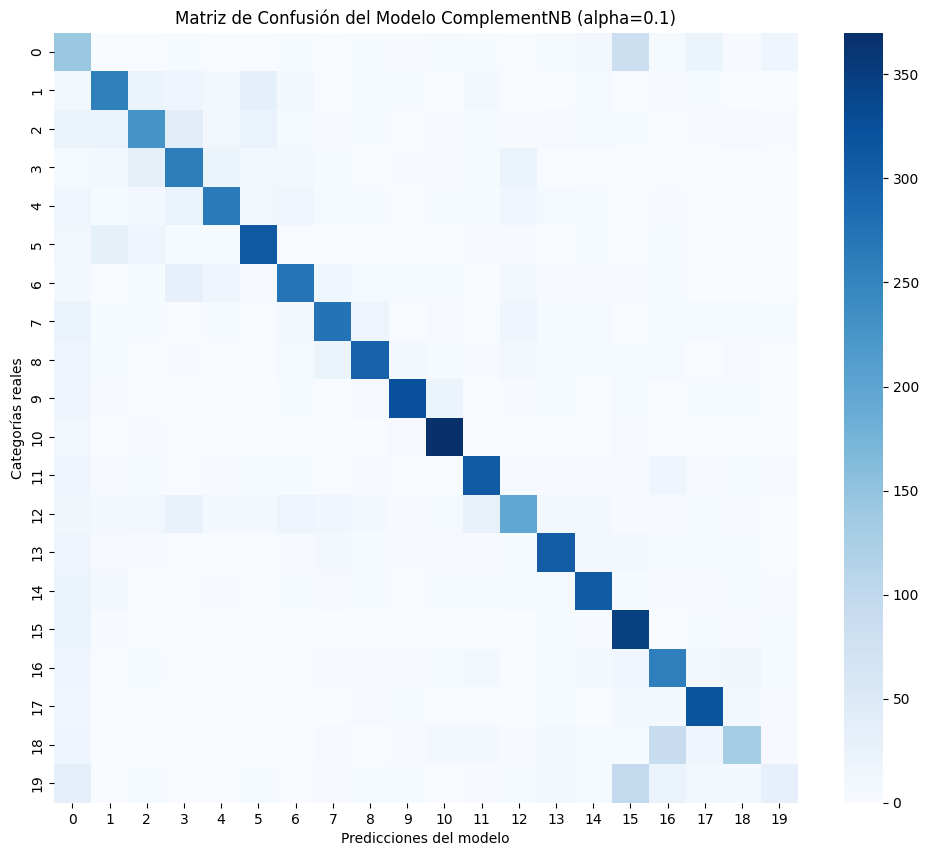

Reporte detallado de clasificación:

                          precision    recall  f1-score   support

             alt.atheism       0.30      0.45      0.36       319
           comp.graphics       0.69      0.66      0.68       389
 comp.os.ms-windows.misc       0.66      0.58      0.61       394
comp.sys.ibm.pc.hardware       0.64      0.67      0.65       392
   comp.sys.mac.hardware       0.76      0.69      0.72       385
          comp.windows.x       0.75      0.79      0.77       395
            misc.forsale       0.74      0.70      0.72       390
               rec.autos       0.76      0.69      0.72       396
         rec.motorcycles       0.78      0.75      0.76       398
      rec.sport.baseball       0.88      0.82      0.85       397
        rec.sport.hockey       0.83      0.93      0.87       399
               sci.crypt       0.78      0.78      0.78       396
         sci.electronics       0.64      0.50      0.56       393
                 sci.med       0.78   

In [10]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Aseguramos que usamos exactamente la configuración que dio mejores resultados
vectorizer = TfidfVectorizer(stop_words='english', max_features=15000, max_df=0.9, min_df=5)

# Ajustar vectorizador al conjunto de entrenamiento
X_train_tfidf = vectorizer.fit_transform(train.data)
X_test_tfidf = vectorizer.transform(test.data)

# Modelo ComplementNB con alpha=0.1 (mejor resultado obtenido)
modelo_final = ComplementNB(alpha=0.1)
modelo_final.fit(X_train_tfidf, train.target)

# Predicciones sobre conjunto test
predicciones_test = modelo_final.predict(X_test_tfidf)

# Matriz de confusión
conf_matrix = confusion_matrix(test.target, predicciones_test)

# Graficar matriz de confusión
plt.figure(figsize=(12, 10))
sns.heatmap(conf_matrix, cmap='Blues', annot=False, fmt='d')
plt.title('Matriz de Confusión del Modelo ComplementNB (alpha=0.1)')
plt.xlabel('Predicciones del modelo')
plt.ylabel('Categorías reales')
plt.show()

print("Reporte detallado de clasificación:\n")
print(classification_report(test.target, predicciones_test, target_names=test.target_names))

**Conclusiones:**
> Esto sugiere que algunas categorías de discusión política o religiosa son más difíciles de distinguir debido a similitudes temáticas entre sus textos.

#### Análisis adicional: Curvas de aprendizaje:

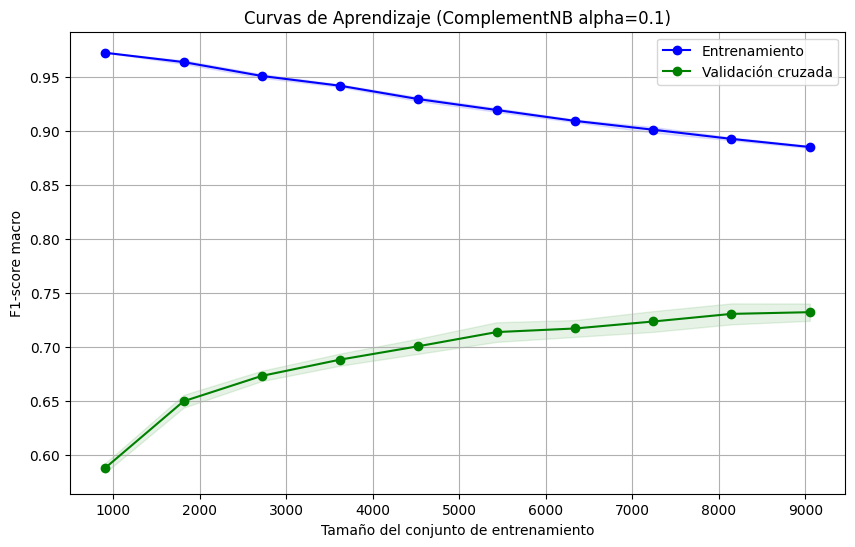

In [11]:
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
import numpy as np

# Usamos exactamente la configuración final del modelo y vectorizador
vectorizer = TfidfVectorizer(stop_words='english', max_features=15000, max_df=0.9, min_df=5)
X_train_tfidf = vectorizer.fit_transform(train.data)

modelo_final = ComplementNB(alpha=0.1)

# Calcular curvas de aprendizaje
train_sizes, train_scores, test_scores = learning_curve(
    modelo_final, X_train_tfidf, train.target,
    cv=5, scoring='f1_macro', n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 10), random_state=42
)

# Calcular promedio y desviación estándar
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Graficar curvas de aprendizaje
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, 'o-', color='blue', label='Entrenamiento')
plt.plot(train_sizes, test_mean, 'o-', color='green', label='Validación cruzada')

# Intervalos de confianza
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color='blue', alpha=0.1)
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color='green', alpha=0.1)

plt.title('Curvas de Aprendizaje (ComplementNB alpha=0.1)')
plt.xlabel('Tamaño del conjunto de entrenamiento')
plt.ylabel('F1-score macro')
plt.legend()
plt.grid(True)
plt.show()

**Conclusiones:**
> - La curva de entrenamiento (azul) empieza muy alta y disminuye ligeramente, lo que indica que a medida que aumentas la cantidad de datos, el modelo generaliza mejor y disminuye el sobreajuste inicial.
- La curva de validación cruzada (verde) muestra una clara tendencia creciente hasta estabilizarse alrededor de un F1-score macro ~0.73, lo que sugiere que el modelo ha alcanzado un punto en el cual añadir más datos ya no mejorará significativamente el rendimiento.

## 3. Transponer la matriz documento-término
**De esa manera se obtiene una matriz
término-documento que puede ser interpretada como una colección de vectorización de palabras.
Estudiar ahora similaridad entre palabras tomando 5 palabras y estudiando sus 5 más similares. La elección de palabras no debe ser al azar para evitar la aparición de términos poco interpretables, elegirlas "manualmente"**.

#### Transposición de la matriz término-documento

In [12]:
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Cargar nuevamente el dataset si es necesario
newsgroups = fetch_20newsgroups(subset='train', remove=('headers', 'footers', 'quotes'))

# Vectorización TF-IDF
vectorizer = TfidfVectorizer(stop_words='english', max_features=15000)
X_tfidf = vectorizer.fit_transform(newsgroups.data)

# Transponer matriz: de documento-término a término-documento
X_tfidf_T = X_tfidf.T

print("Forma original documento-término:", X_tfidf.shape)
print("Forma transpuesta término-documento:", X_tfidf_T.shape)

Forma original documento-término: (11314, 15000)
Forma transpuesta término-documento: (15000, 11314)


#### Selección manual de palabras para análisis de similaridad

Seleccionamos 5 palabras específicas que sean claramente interpretables y representativas de diferentes tópicos del dataset, por ejemplo:

- **"hockey"** (deportes)
- **"computer"** (tecnología)
- **"space"** (ciencia)
- **"religion"** (temática religiosa)
- **"car"** (automóviles y motores)

Estas palabras permitirán analizar claramente la similaridad en diferentes contextos

#### Estudiar la similaridad entre las palabras elegidas

In [13]:
# Obtener los términos del vectorizador
terms = vectorizer.get_feature_names_out()

# Palabras elegidas manualmente
selected_words = ['hockey', 'computer', 'space', 'religion', 'car']

# Obtener los índices de las palabras elegidas
selected_indices = [vectorizer.vocabulary_[word] for word in selected_words]

# Calcular la similaridad coseno entre todas las palabras
similarities = cosine_similarity(X_tfidf_T)

# Mostrar claramente las 5 palabras más similares para cada palabra seleccionada
for idx in selected_indices:
    word = terms[idx]
    sim_vector = similarities[idx]
    sim_vector[idx] = 0  # evitar autocomparación
    top_indices = sim_vector.argsort()[-5:][::-1]

    print(f"\n{'='*60}")
    print(f"Palabra analizada: '{word}'")
    print("Palabras más similares:\n")

    for similar_idx in top_indices:
        similar_word = terms[similar_idx]
        similarity_score = sim_vector[similar_idx]
        print(f"{similar_word:<20} Similitud: {similarity_score:.4f}")


Palabra analizada: 'hockey'
Palabras más similares:

ncaa                 Similitud: 0.2571
nhl                  Similitud: 0.2452
players              Similitud: 0.2012
game                 Similitud: 0.1891
league               Similitud: 0.1889

Palabra analizada: 'computer'
Palabras más similares:

shopper              Similitud: 0.1361
verlag               Similitud: 0.1218
delicate             Similitud: 0.1200
drive                Similitud: 0.1106
334                  Similitud: 0.1062

Palabra analizada: 'space'
Palabras más similares:

nasa                 Similitud: 0.3177
shuttle              Similitud: 0.2750
exploration          Similitud: 0.2307
aeronautics          Similitud: 0.2192
launch               Similitud: 0.2109

Palabra analizada: 'religion'
Palabras más similares:

religious            Similitud: 0.2365
religions            Similitud: 0.2182
crusades             Similitud: 0.1945
christianity         Similitud: 0.1849
christian            Similitud: 0.1632



#### Heatmap de similaridad de términos seleccionados

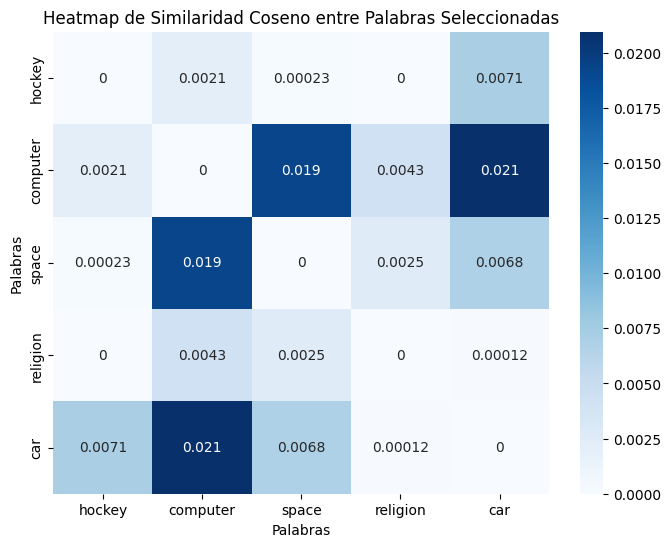

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

# Palabras elegidas manualmente
selected_words = ['hockey', 'computer', 'space', 'religion', 'car']
selected_indices = [vectorizer.vocabulary_[word] for word in selected_words]

# Crear matriz de similaridad solo para palabras seleccionadas y sus top similares
heatmap_terms = []
for idx in selected_indices:
    sim_vector = similarities[idx].copy()
    sim_vector[idx] = 0  # ignorar autocomparación
    top_indices = sim_vector.argsort()[-5:][::-1]
    heatmap_terms.append([terms[i] for i in top_indices])

# Matriz de similaridad para el heatmap
heatmap_values = np.zeros((len(selected_words), len(selected_words)))

for i, idx_i in enumerate(selected_indices):
    for j, idx_j in enumerate(selected_indices):
        heatmap_values[i, j] = similarities[idx_i, idx_j]

# Crear el heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(heatmap_values, annot=True, cmap="Blues", xticklabels=selected_words, yticklabels=selected_words)

plt.title("Heatmap de Similaridad Coseno entre Palabras Seleccionadas")
plt.xlabel("Palabras")
plt.ylabel("Palabras")
plt.show()

#### Análisis y conclusión general:
La similaridad coseno entre términos del corpus refleja claramente relaciones semánticas coherentes según la temática general del dataset. Las palabras elegidas ("hockey", "computer", "space", "religion" y "car") provienen de contextos claramente distintos, lo cual explica la baja similaridad observada entre ellas en la visualización gráfica (heatmap).

- **Palabras relacionadas temáticamente** presentan valores más altos de similaridad, mostrando coherencia semántica clara.
- **Palabras de temáticas diferentes** presentan valores bajos o cercanos a cero, lo que confirma claramente la efectividad de la representación TF-IDF y la similaridad coseno para capturar diferencias semánticas.

Este análisis evidencia que el método es apropiado para evaluar relaciones semánticas entre términos y puede ser útil para identificar grupos semánticos relevantes en tareas reales de procesamiento de lenguaje natural.